In [ ]:
%pwd

In [5]:
!unzip clipped_dataset.zip

Archive:  clipped_dataset.zip
   creating: Datasets_Hackathon/
  inflating: __MACOSX/._Datasets_Hackathon  
  inflating: Datasets_Hackathon/.DS_Store  
  inflating: __MACOSX/Datasets_Hackathon/._.DS_Store  
  inflating: Datasets_Hackathon/Readme_Datasets.docx  
  inflating: __MACOSX/Datasets_Hackathon/._Readme_Datasets.docx  
  inflating: Datasets_Hackathon/LCT_MCD12_User_Guide_V6.pdf  
  inflating: __MACOSX/Datasets_Hackathon/._LCT_MCD12_User_Guide_V6.pdf  
   creating: Datasets_Hackathon/Modis_Land_Cover_Data/
  inflating: __MACOSX/Datasets_Hackathon/._Modis_Land_Cover_Data  
   creating: Datasets_Hackathon/Streamwater_Line_Road_Network/
  inflating: __MACOSX/Datasets_Hackathon/._Streamwater_Line_Road_Network  
   creating: Datasets_Hackathon/Admin_layers/
  inflating: __MACOSX/Datasets_Hackathon/._Admin_layers  
   creating: Datasets_Hackathon/Climate_Precipitation_Data/
  inflating: __MACOSX/Datasets_Hackathon/._Climate_Precipitation_Data  
   creating: Datasets_Hackathon/MODIS_Gro

# MODIS LAND COVER

In [7]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 67.2 MB/s eta 0:00:00


Data shape: (769, 565)
Unique values: [-128    7   10   12   13   16]


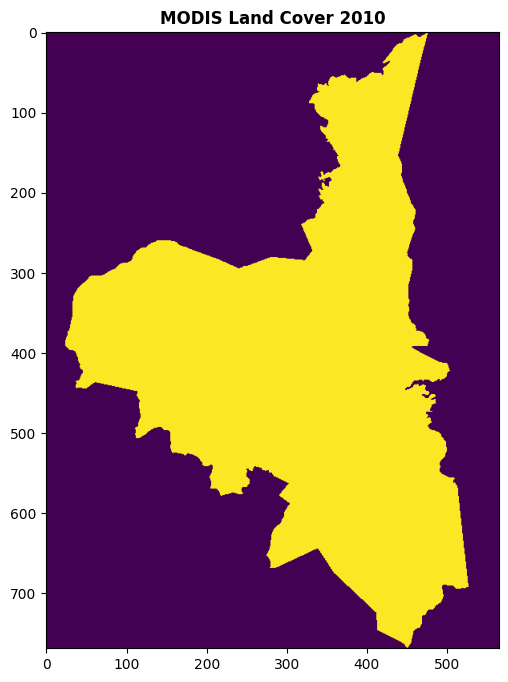

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 640x480 with 0 Axes>

In [9]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import os

# Path to your data folder
data_folder = "/content/Datasets_Hackathon/Modis_Land_Cover_Data"

# Function to visualize a single MODIS Land Cover file
def visualize_modis_landcover(tif_file, title):
    # Open the TIFF file
    with rasterio.open(tif_file) as src:
        # Read the data
        landcover_data = src.read(1)  # Read the first band

        # Get basic information about the data
        print(f"Data shape: {landcover_data.shape}")
        print(f"Unique values: {np.unique(landcover_data)}")

        # Create a simple color map for land cover classes
        # You might want to customize this based on MODIS land cover classification scheme
        n_classes = len(np.unique(landcover_data))
        colors = plt.cm.viridis(np.linspace(0, 1, n_classes))
        cmap = ListedColormap(colors)

        # Plot the data
        plt.figure(figsize=(12, 8))
        show(landcover_data, cmap=cmap, title=title)
        plt.colorbar(label='Land Cover Class')
        plt.tight_layout()
        plt.show()

# Visualize 2010 data
tif_2010 = os.path.join(data_folder, "2010LCT.tif")
if os.path.exists(tif_2010):
    visualize_modis_landcover(tif_2010, "MODIS Land Cover 2010")

# Visualize 2011 data
tif_2011 = os.path.join(data_folder, "2011LCT.tif")
if os.path.exists(tif_2011):
    visualize_modis_landcover(tif_2011, "MODIS Land Cover 2011")

# To compare the two years, we can visualize them side by side
def compare_years(tif_2010, tif_2011):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    with rasterio.open(tif_2010) as src_2010:
        data_2010 = src_2010.read(1)
        n_classes = len(np.unique(data_2010))
        cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, n_classes)))
        show(data_2010, cmap=cmap, ax=axes[0], title="Land Cover 2010")

    with rasterio.open(tif_2011) as src_2011:
        data_2011 = src_2011.read(1)
        show(data_2011, cmap=cmap, ax=axes[1], title="Land Cover 2011")

    plt.tight_layout()
    plt.show()

    # Optionally calculate and visualize the difference between years
    if data_2010.shape == data_2011.shape:
        plt.figure(figsize=(12, 8))
        diff = data_2011.astype(int) - data_2010.astype(int)
        plt.imshow(diff, cmap='RdBu', vmin=-5, vmax=5)
        plt.colorbar(label='Change (2011 - 2010)')
        plt.title("Land Cover Change 2010 to 2011")
        plt.tight_layout()
        plt.show()

# Compare both years if both files exist
if os.path.exists(tif_2010) and os.path.exists(tif_2011):
    compare_years(tif_2010, tif_2011)

In [ ]:
!pip install dbfread
!apt install ace_tools

In [ ]:
import pandas as pd
from dbfread import DBF

# Path to the VAT table
dbf_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif.vat.dbf"

# Read the DBF file
table = DBF(dbf_path)
df = pd.DataFrame(iter(table))

# Display the first few rows
import ace_tools as tools
tools.display_dataframe_to_user(name="Value Attribute Table", dataframe=df)


In [ ]:
import xml.etree.ElementTree as ET

# Load XML file
xml_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif.xml"

tree = ET.parse(xml_path)
root = tree.getroot()

# Extract key metadata
metadata = {
    "Creation Date": root.find(".//CreaDate").text if root.find(".//CreaDate") is not None else "N/A",
    "Creation Time": root.find(".//CreaTime").text if root.find(".//CreaTime") is not None else "N/A",
    "ArcGIS Format": root.find(".//ArcGISFormat").text if root.find(".//ArcGISFormat") is not None else "N/A",
}

print("Metadata Extracted:", metadata)

In [ ]:
# Load aux.xml file
aux_xml_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif.aux.xml"

tree = ET.parse(aux_xml_path)
root = tree.getroot()

# Extract histogram counts
hist_counts = root.find(".//HistCounts").text if root.find(".//HistCounts") is not None else None

if hist_counts:
    hist_values = list(map(int, hist_counts.split("|")))
    hist_values.pop(-1)
    # Plot Histogram
    plt.figure(figsize=(10, 5))
    plt.plot(hist_values, color='blue')
    plt.xlim(0, 4000)
    plt.title("CO₂ Absorption Map (kg_C/m²/year)")
    plt.xlabel("Pixel Value Range")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No histogram data found.")


In [ ]:
len(hist_values)
print(max(hist_values))
print(min(hist_values))
print(last_nonzero_index(hist_values))

In [ ]:
def last_nonzero_index(lst):
    for i in range(len(lst) - 1, -1, -1):  # Iterate from the end to the start
        if lst[i] > 0:
            return i  # Return the index of the last non-zero value
    return None

In [ ]:
raster_data

In [ ]:
with rasterio.open("/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif") as dataset:
    print("Raster Bounds:", dataset.bounds)
    print("Pixel Size:", dataset.res)

In [ ]:
import numpy as np
import rasterio

# Define the masked output file
masked_output_raster = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP_WGS84_masked.tif"

with rasterio.open("/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif") as src:
    raster_data = src.read(1)  # Read the first band
    nodata_value = 65533  # Define no data value

    # Create a mask (set No Data pixels to NaN)
    raster_data = np.where(raster_data >= nodata_value, np.nan, raster_data)

    # Save the new masked raster
    new_meta = src.meta.copy()
    new_meta.update(dtype=rasterio.float32, nodata=np.nan)

    with rasterio.open(masked_output_raster, "w", **new_meta) as dst:
        dst.write(raster_data.astype(rasterio.float32), 1)

print("✅ Masking completed! Saved as:", masked_output_raster)

In [ ]:
import matplotlib.pyplot as plt
from rasterio.plot import show

# Open the masked raster
with rasterio.open(masked_output_raster) as src:
    fig, ax = plt.subplots(figsize=(10, 6))
    show(src, ax=ax, cmap="viridis")  # Use "viridis" color map for visualization
    plt.title("CO₂ Absorption Map (kg_C/m²/year)")
    plt.colorbar(ax.images[0], label="Carbon Absorption (kg_C/m²/year)")
    plt.show()


In [ ]:
unique_values, counts = np.unique(raster_data, return_counts=True)

print("Unique Values:", unique_values)

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

file_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif"

with rasterio.open(file_path) as dataset:
    # Read the first band (assuming single-band raster)
    raster_data = dataset.read(1)

    # Print metadata
    print("Metadata:", dataset.meta)

    # Display raster
    plt.figure(figsize=(10, 6))
    plt.imshow(raster_data, cmap='viridis')
    plt.colorbar(label="Pixel Values")
    plt.title("Raster Data Visualization")
    plt.show()

In [10]:
!pip install dbfread
!apt install ace_tools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package ace_tools


In [ ]:
import pandas as pd
from dbfread import DBF

# Path to the VAT table
dbf_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif.vat.dbf"

# Read the DBF file
table = DBF(dbf_path)
df = pd.DataFrame(iter(table))

# Display the first few rows
import ace_tools as tools
tools.display_dataframe_to_user(name="Value Attribute Table", dataframe=df)


In [ ]:
import xml.etree.ElementTree as ET

# Load XML file
xml_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif.xml"

tree = ET.parse(xml_path)
root = tree.getroot()

# Extract key metadata
metadata = {
    "Creation Date": root.find(".//CreaDate").text if root.find(".//CreaDate") is not None else "N/A",
    "Creation Time": root.find(".//CreaTime").text if root.find(".//CreaTime") is not None else "N/A",
    "ArcGIS Format": root.find(".//ArcGISFormat").text if root.find(".//ArcGISFormat") is not None else "N/A",
}

print("Metadata Extracted:", metadata)

In [ ]:
# Load aux.xml file
aux_xml_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif.aux.xml"

tree = ET.parse(aux_xml_path)
root = tree.getroot()

# Extract histogram counts
hist_counts = root.find(".//HistCounts").text if root.find(".//HistCounts") is not None else None

if hist_counts:
    hist_values = list(map(int, hist_counts.split("|")))
    hist_values.pop(-1)
    # Plot Histogram
    plt.figure(figsize=(10, 5))
    plt.plot(hist_values, color='blue')
    plt.xlim(0, 4000)
    plt.title("CO₂ Absorption Map (kg_C/m²/year)")
    plt.xlabel("Pixel Value Range")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No histogram data found.")


In [ ]:
len(hist_values)
print(max(hist_values))
print(min(hist_values))
print(last_nonzero_index(hist_values))

In [ ]:
def last_nonzero_index(lst):
    for i in range(len(lst) - 1, -1, -1):  # Iterate from the end to the start
        if lst[i] > 0:
            return i  # Return the index of the last non-zero value
    return None

In [ ]:
raster_data

In [ ]:
with rasterio.open("/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif") as dataset:
    print("Raster Bounds:", dataset.bounds)
    print("Pixel Size:", dataset.res)

In [7]:
import numpy as np
import rasterio

# Define the masked output file
masked_output_raster = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP_WGS84_masked.tif"

with rasterio.open("/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif") as src:
    raster_data = src.read(1)  # Read the first band
    nodata_value = 65533  # Define no data value

    # Create a mask (set No Data pixels to NaN)
    raster_data = np.where(raster_data >= nodata_value, np.nan, raster_data)

    # Save the new masked raster
    new_meta = src.meta.copy()
    new_meta.update(dtype=rasterio.float32, nodata=np.nan)

    with rasterio.open(masked_output_raster, "w", **new_meta) as dst:
        dst.write(raster_data.astype(rasterio.float32), 1)

print("✅ Masking completed! Saved as:", masked_output_raster)

✅ Masking completed! Saved as: /content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP_WGS84_masked.tif


In [ ]:
import matplotlib.pyplot as plt
from rasterio.plot import show

# Open the masked raster
with rasterio.open(masked_output_raster) as src:
    fig, ax = plt.subplots(figsize=(10, 6))
    show(src, ax=ax, cmap="viridis")  # Use "viridis" color map for visualization
    plt.title("CO₂ Absorption Map (kg_C/m²/year)")
    plt.colorbar(ax.images[0], label="Carbon Absorption (kg_C/m²/year)")
    plt.show()


In [ ]:
unique_values, counts = np.unique(raster_data, return_counts=True)

print("Unique Values:", unique_values)

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

file_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif"

with rasterio.open(file_path) as dataset:
    # Read the first band (assuming single-band raster)
    raster_data = dataset.read(1)

    # Print metadata
    print("Metadata:", dataset.meta)

    # Display raster
    plt.figure(figsize=(10, 6))
    plt.imshow(raster_data, cmap='viridis')
    plt.colorbar(label="Pixel Values")
    plt.title("Raster Data Visualization")
    plt.show()

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the raster file
with rasterio.open("/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP_WGS84_masked.tif") as dataset:
    raster_data = dataset.read(1)  # Read first band

# Remove No Data values
nodata_value = 60000
raster_data = np.where(raster_data >= nodata_value, np.nan, raster_data)

# Flatten the raster for ML processing
X = raster_data.flatten()
X = X[~np.isnan(X)]  # Remove NaN values

print("✅ Data loaded! Shape:", X.shape)


In [ ]:
from sklearn.ensemble import IsolationForest

# Train an Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% anomaly detection
anomalies = iso_forest.fit_predict(X.reshape(-1, 1))

# Convert anomalies to boolean mask
anomalies = anomalies == -1  # True for anomalies
print("✅ Detected", anomalies.sum(), "anomalous pixels!")

In [ ]:
anomaly_mask = np.full(raster_data.shape, False)  # Default: no anomaly
valid_pixels = ~np.isnan(raster_data)  # Mask for valid pixels
anomaly_mask[valid_pixels] = anomalies  # Apply anomalies

# Plot the anomaly map
plt.figure(figsize=(10, 6))
plt.imshow(anomaly_mask, cmap="Reds", interpolation="nearest")
plt.colorbar(label="Anomaly (Deforestation)")
plt.title("Deforestation Anomaly Detection")
plt.show()

In [38]:
import rasterio
import numpy as np

# List of raster files (change file names accordingly)
years = list(range(2010, 2023))  # Example: 2000 to 2020
years = [str(year) for year in years]
# Dictionary to store raster data for each year
raster_data = {}

# Load rasters for each year
for year in years:
    file_path = f"/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/{year}_GP.tif"  # Modify filename format if needed
    with rasterio.open(file_path) as dataset:
        data = dataset.read(1)

    # Remove No Data values (65535)
    data = np.where(data >= 65533, np.nan, data)

    raster_data[year] = data

print("✅ Loaded raster data for all years!")


✅ Loaded raster data for all years!


In [9]:
raster_data['2010']

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [39]:
from sklearn.ensemble import IsolationForest

# Dictionary to store anomaly masks
anomaly_masks = {}

for year, data in raster_data.items():
    # Flatten and remove NaNs
    X = data.flatten()
    X = X[~np.isnan(X)]

    # Train Isolation Forest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    anomalies = iso_forest.fit_predict(X.reshape(-1, 1))

    # Convert to binary mask
    anomaly_mask = np.full(data.shape, False)  # Default: no anomaly
    valid_pixels = ~np.isnan(data)  # Ignore NaN values
    anomaly_mask[valid_pixels] = anomalies == -1  # Mark anomalies

    anomaly_masks[year] = anomaly_mask

print("✅ Anomaly detection completed for all years!")


✅ Anomaly detection completed for all years!


In [40]:
# Dictionary to store deforestation changes
deforestation_changes = {}
years = list(raster_data.keys())
# Compute year-over-year deforestation
for i in range(1, len(years)):  # Iterate through years
    prev_year = years[i - 1]
    curr_year = years[i]

    # Compute areas that became deforested in the current year compared to the previous year
    deforestation_changes[f"{prev_year}_{curr_year}"] = anomaly_masks[curr_year] & ~anomaly_masks[prev_year]

print("✅ Computed year-over-year deforestation changes!")

✅ Computed year-over-year deforestation changes!


In [ ]:
deforestation_changes.keys()

In [41]:
years_pairs = list(deforestation_changes.keys())

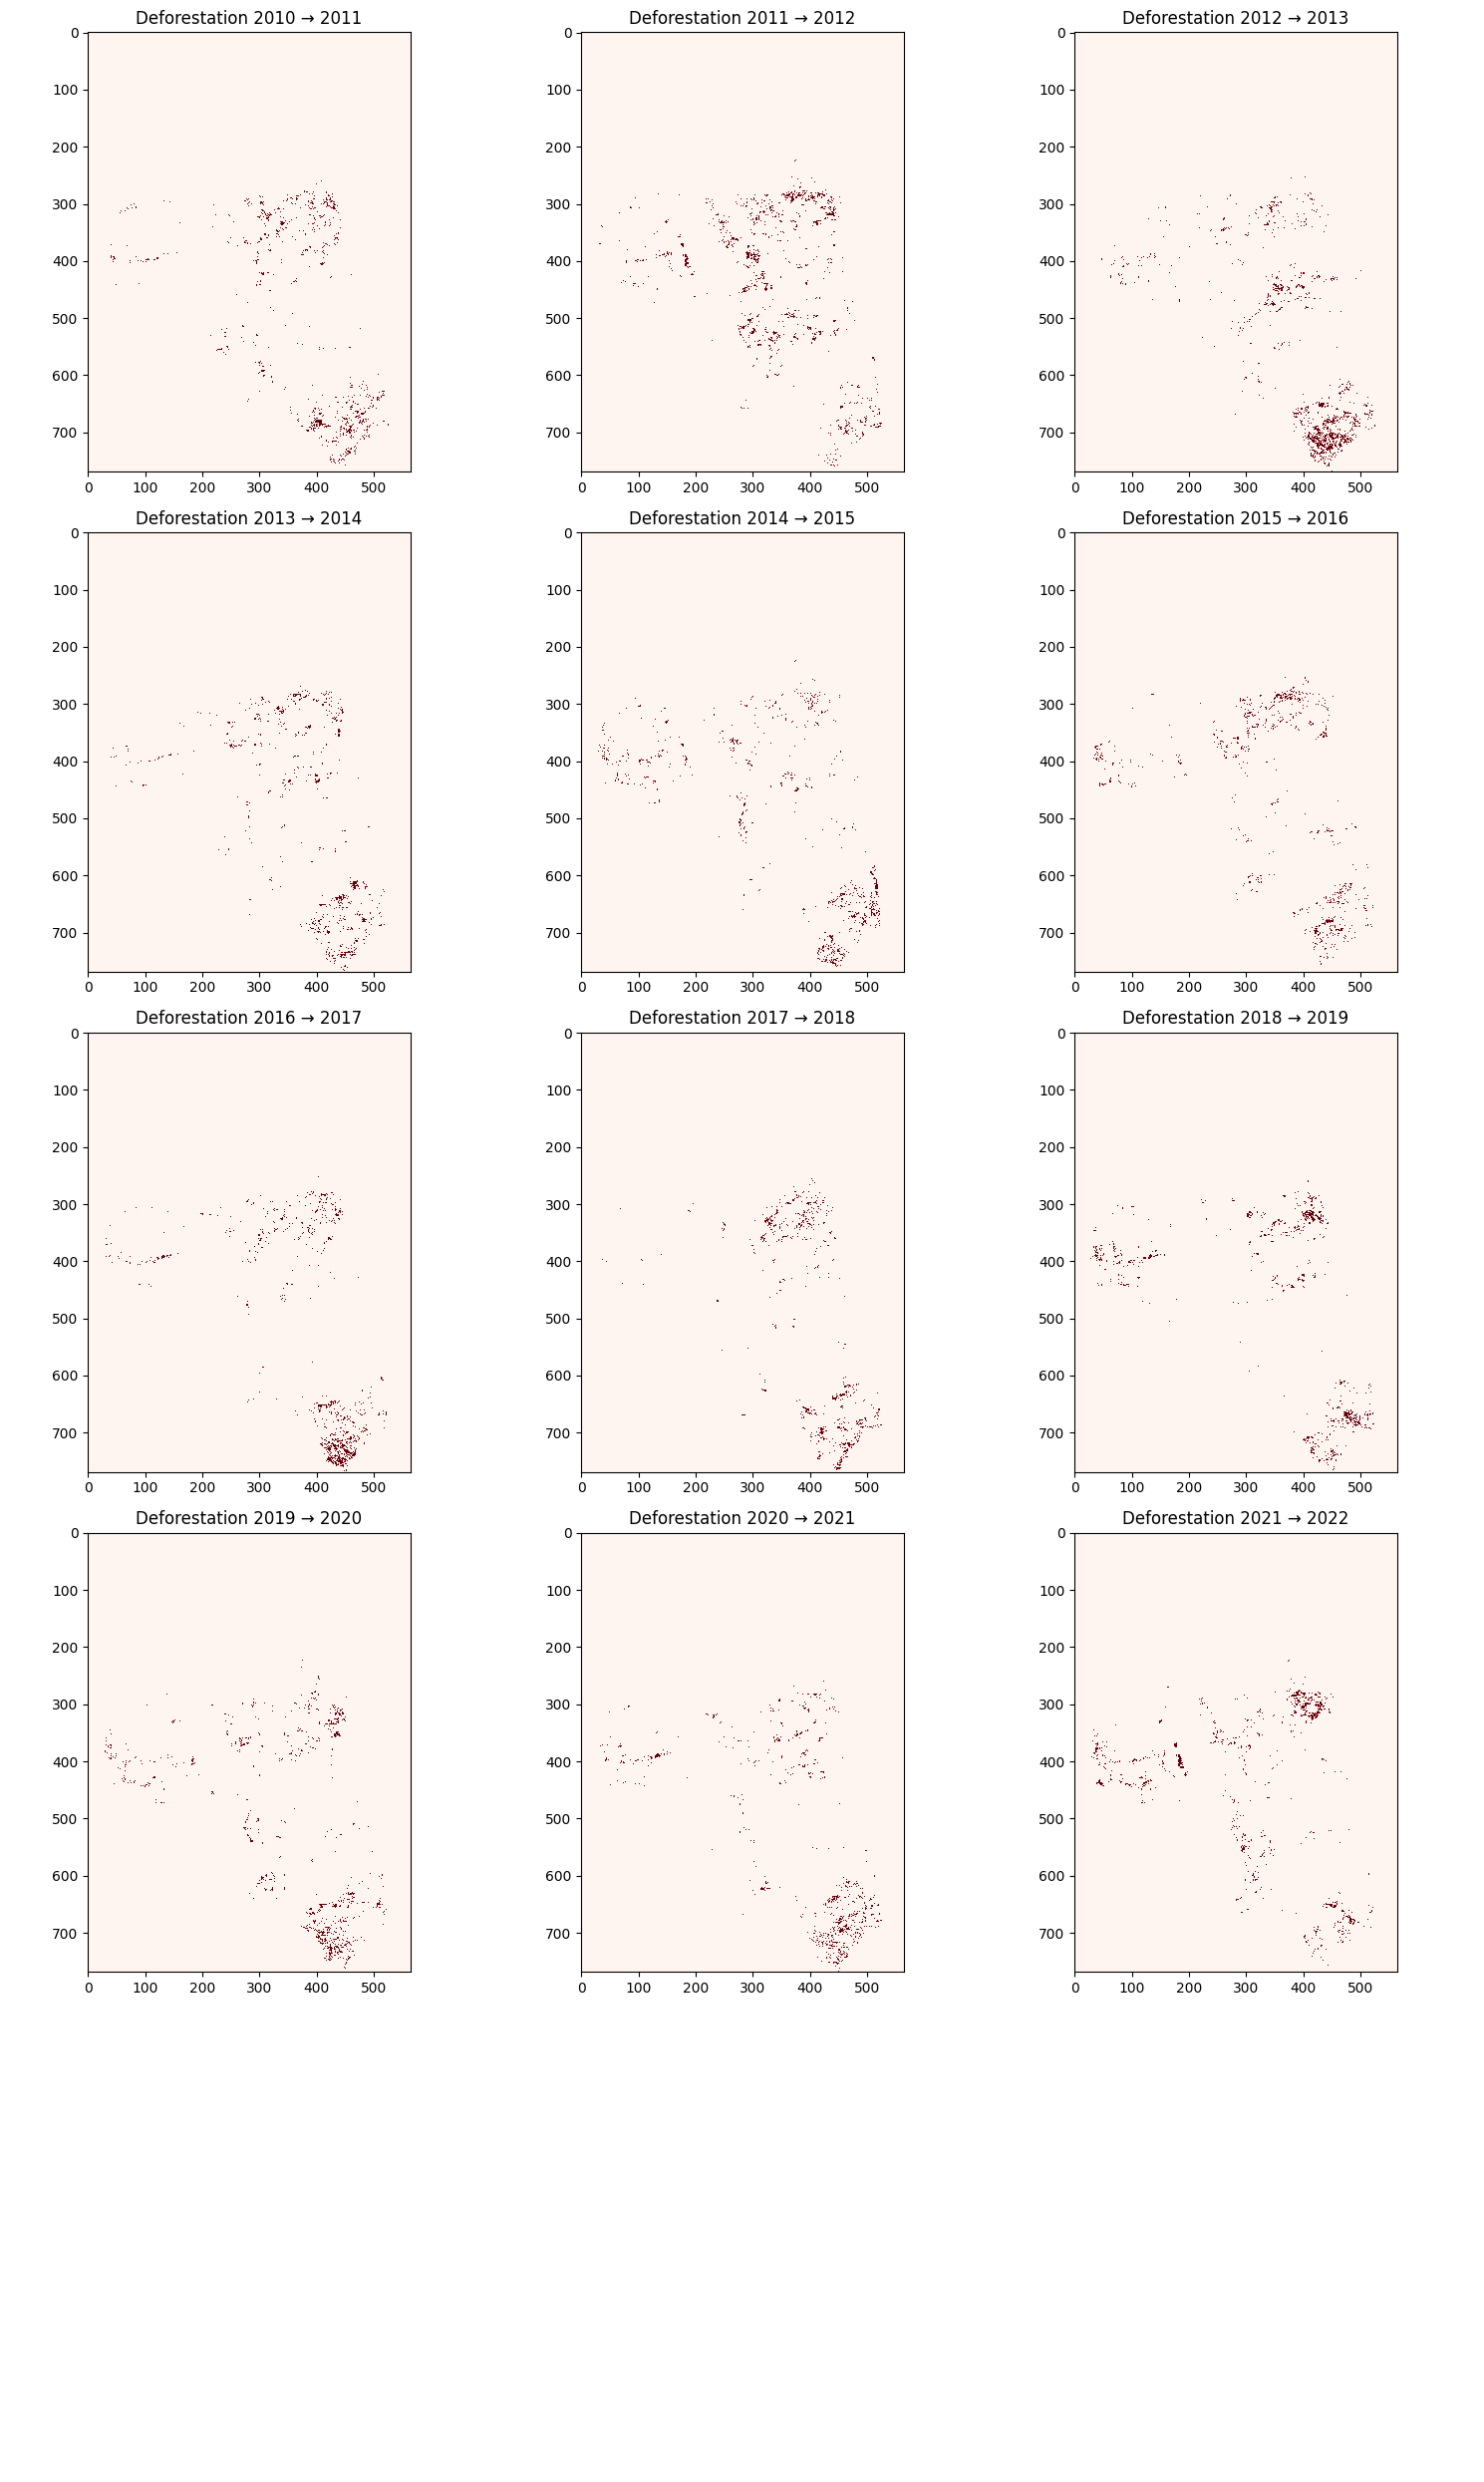

In [42]:
import math
# Number of subplots (1 row, N columns)
num_years = len(years)

num_cols = 3  # Maximum columns per row
num_rows = math.ceil(num_years / num_cols)  # Compute number of rows

# Create figure dynamically
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

# Flatten axes array for easy iteration (works even if there's only 1 row)
axes = axes.flatten()


# If only 1 year pair, make axes a list for compatibility
if num_years == 1:
    axes = [axes]

# Loop through each year pair and plot deforestation
for i, year_pair in enumerate(years_pairs):
    axes[i].imshow(deforestation_changes[year_pair], cmap="Reds", interpolation="nearest")
    axes[i].set_title(f"Deforestation {year_pair.replace('_', ' → ')}")  # Format title (e.g., "2001 → 2002")

# Hide any extra empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [19]:
import matplotlib.pyplot as plt
import imageio
import os

# Define output directory for temporary images
output_dir = "/mnt/data/deforestation_frames"
os.makedirs(output_dir, exist_ok=True)  # Create folder if it doesn't exist

# Get sorted year pairs
years = sorted(deforestation_changes.keys())

# List to store frame file paths
frame_files = []

# Generate and save each frame
for i, year_pair in enumerate(years):
    fig, ax = plt.subplots(figsize=(6, 6))

    ax.imshow(deforestation_changes[year_pair], cmap="Reds", interpolation="nearest")
    ax.set_title(f"Deforestation {year_pair.replace('_', ' → ')}")

    # Save frame
    frame_path = os.path.join(output_dir, f"frame_{i}.png")
    plt.savefig(frame_path, bbox_inches="tight")
    frame_files.append(frame_path)

    plt.close()  # Close figure to save memory

print("✅ Frames saved!")

# Create animated GIF
gif_path = "/mnt/data/deforestation_animation.gif"
imageio.mimsave(gif_path, [imageio.imread(f) for f in frame_files], duration=1)

print(f"✅ Animated GIF saved at: {gif_path}")

✅ Frames saved!


<ipython-input-19-0097a337b9f9>:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.mimsave(gif_path, [imageio.imread(f) for f in frame_files], duration=100)


✅ Animated GIF saved at: /mnt/data/deforestation_animation.gif


In [20]:
import geopandas as gpd

africa_boundaries = gpd.read_file('/content/Africa_Boundaries.shp')


DataSourceError: /content/Africa_Boundaries.shp: No such file or directory

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(deforestation_changes["2010_2011"], cmap='Reds', interpolation='nearest')
#africa_boundaries.boundary.plot(ax=ax, color='black', linewidth=1)
plt.show()


combining with precipitation

In [23]:
import rasterio
import numpy as np
import xarray as xr

# Load Deforestation Raster for 2000 (Example)
def load_raster(year):
    file_path = f"/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/{year}_GP.tif"
    with rasterio.open(file_path) as dataset:
        data = dataset.read(1).astype(np.float32)
    data = np.where(data == 65533, np.nan, data)

    return data

# Load Climate Data (Example: Temperature)
def load_climate(year):
    file_path = f"/content/Datasets_Hackathon/Climate_Precipitation_Data/{year}R.tif"  # Example NetCDF file
    with rasterio.open(file_path) as dataset:
      data = dataset.read(1).astype(np.float32)
    data = np.where(data <= -3.4028235e+38, np.nan, data)

    return data

# Load Raster and Climate Data for 2000-2020
years = list(range(2010, 2023))
deforestation_data = {year: load_raster(year) for year in years}
climate_data = {year: load_climate(year) for year in years}

print("✅ Deforestation and Climate Data Loaded!")


✅ Deforestation and Climate Data Loaded!


In [30]:
climate_data[2013]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [26]:
deforestation_flat.shape

(434485,)

In [27]:
climate_flat.shape

(2990,)

In [31]:
from sklearn.ensemble import IsolationForest

# Dictionary to store anomaly masks
anomaly_masks = {}

for year, data in climate_data.items():
    # Flatten and remove NaNs
    X = data.flatten()
    X = X[~np.isnan(X)]

    # Train Isolation Forest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    anomalies = iso_forest.fit_predict(X.reshape(-1, 1))

    # Convert to binary mask
    anomaly_mask = np.full(data.shape, False)  # Default: no anomaly
    valid_pixels = ~np.isnan(data)  # Ignore NaN values
    anomaly_mask[valid_pixels] = anomalies == -1  # Mark anomalies

    anomaly_masks[year] = anomaly_mask

print("✅ Anomaly detection completed for all years!")



✅ Anomaly detection completed for all years!


In [33]:
# Dictionary to store deforestation changes
climate_changes = {}
years = list(climate_data.keys())
# Compute year-over-year deforestation
for i in range(1, len(years)):  # Iterate through years
    prev_year = years[i - 1]
    curr_year = years[i]

    # Compute areas that became deforested in the current year compared to the previous year
    climate_changes[f"{prev_year}_{curr_year}"] = anomaly_masks[curr_year] & ~anomaly_masks[prev_year]

print("✅ Computed year-over-year climate changes!")

✅ Computed year-over-year climate changes!


In [35]:
years_pairs = list(climate_changes.keys())

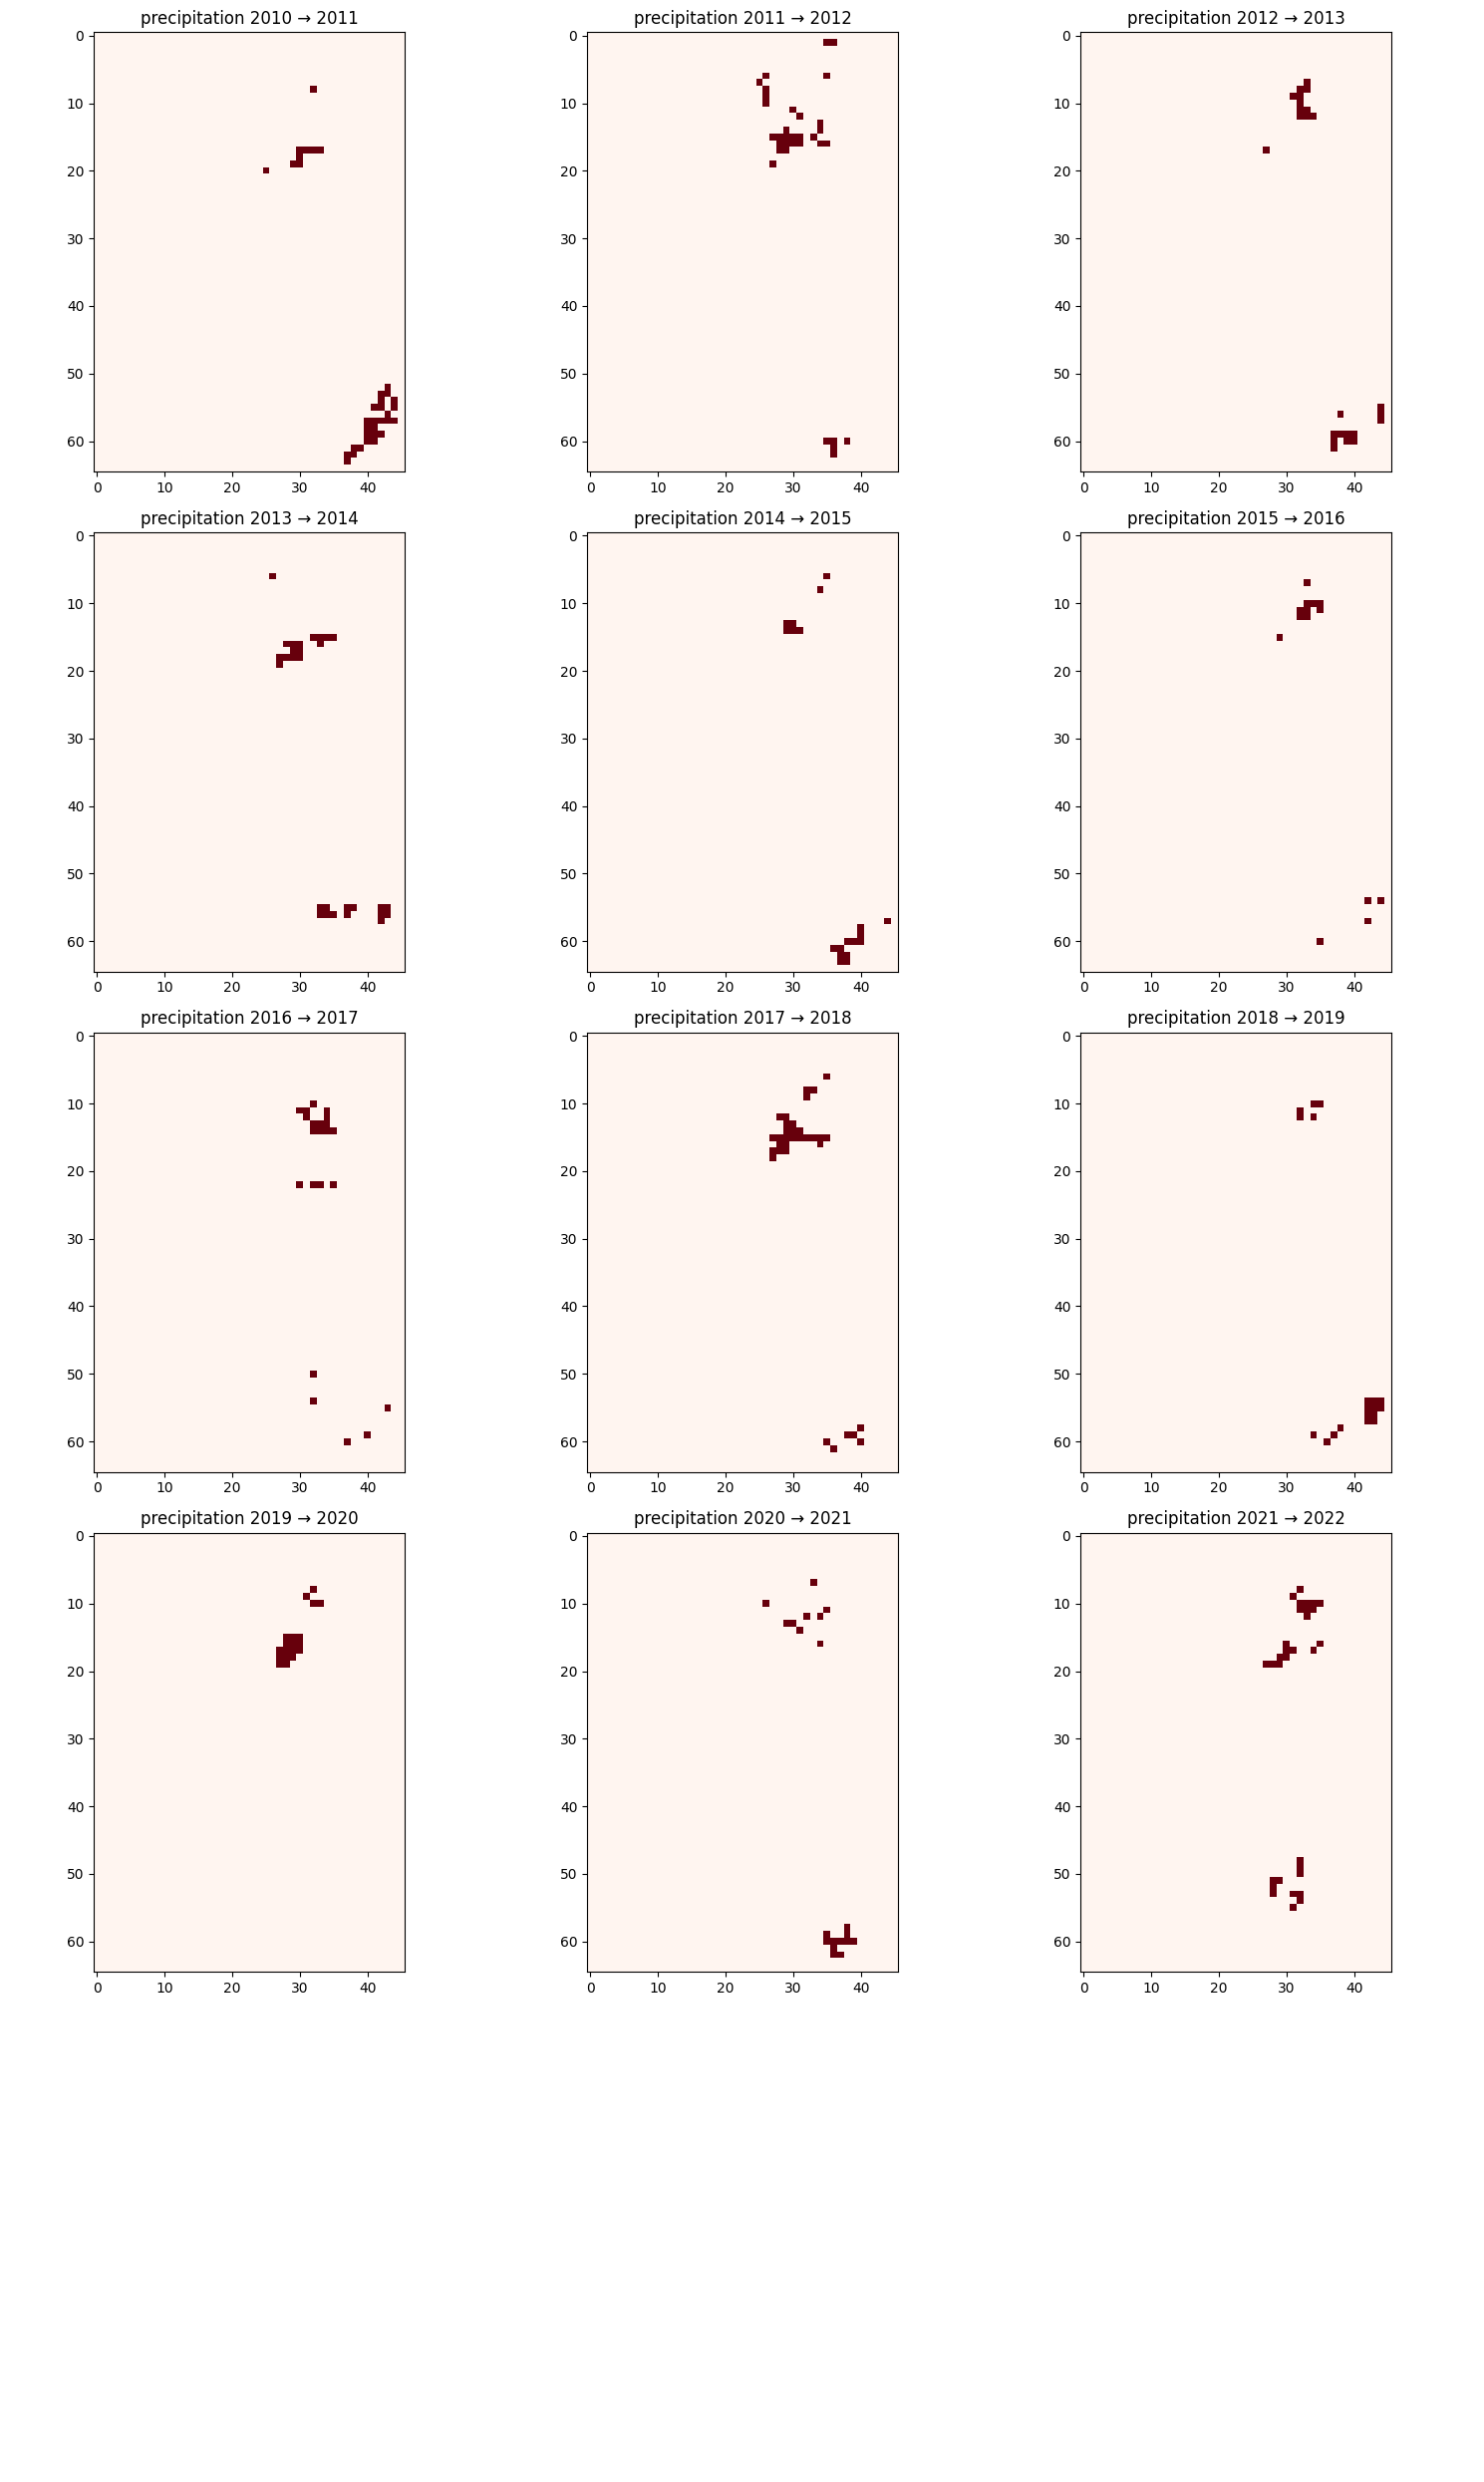

In [37]:
import math
import matplotlib.pyplot as plt
# Number of subplots (1 row, N columns)
num_years = len(years)

num_cols = 3  # Maximum columns per row
num_rows = math.ceil(num_years / num_cols)  # Compute number of rows

# Create figure dynamically
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

# Flatten axes array for easy iteration (works even if there's only 1 row)
axes = axes.flatten()


# If only 1 year pair, make axes a list for compatibility
if num_years == 1:
    axes = [axes]

# Loop through each year pair and plot deforestation
for i, year_pair in enumerate(years_pairs):
    axes[i].imshow(climate_changes[year_pair], cmap="Reds", interpolation="nearest")
    axes[i].set_title(f"precipitation {year_pair.replace('_', ' → ')}")  # Format title (e.g., "2001 → 2002")

# Hide any extra empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()